In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random as rd
from sklearn import neighbors
import sklearn
import time
from sklearn.cluster import KMeans

In [43]:
mat = scipy.io.loadmat('mnist-original.mat') 
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(784,1) for i in range(len(data))]
X_beta = [data[i].reshape(28,28) for i in range(len(data)) ] # on créé une nouvelle liste qui va contenir nos matrices 28x28
k=10 # nombre de cluster utilisé
m=70000 # nombre de données utilisées
n=784  
tol=10**(-3)

In [3]:
def index_chiffre(n, y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    return [i for i in range(len(y)) if y[i]==n] 

def image_moyenne(n, X, y): # cette fonction renvoie la matrice moyenne (centroïde) pour le chiffre n
    index = index_chiffre(n, y) 
    sum_matrice = np.zeros((28,28)) # la matrice qui sera utilisée dans la somme
    for i in index:
        sum_matrice += X[i] # on somme toutes les matrices représentants le chiffre n
    return sum_matrice/len(index)

def re_clusters(X, centroids, k):# fonction qui recalcule les clusters
    clusters = {}
    indice=[[] for i in range(k)]
    for i in range(k):
        clusters[i] = []
    for i in range(m):
        euc_dist = [np.linalg.norm(X[i] - centroids[j]) for j in range(k)]
        clusters[np.argmin(np.asarray(euc_dist))].append(X[i])
        indice[np.argmin(np.asarray(euc_dist))].append(i)
    return [clusters,indice]

def re_centroids(clusters, k):# fonction qui recalcule les centroids
    centroids= {}
    for i in range(k):
        centroids[i] = np.mean(clusters[i], axis=0)
        
    return centroids

def coherence(centroids_j, clusters_j):
    temp=[np.linalg.norm(data - centroids_j)**2 for data in clusters_j ]
    return sum(temp)

def quality(centroids, clusters):
    temp=[coherence(centroids[i],clusters[i]) for i in range(k)]
    return sum(temp)

#compter le nb d'éléments : x = chaque chiffre et labels = liste des labels 
def nb_occurences(x,labels):
    n=0
    for i in labels:
        if x==i:
            n=n+1
    return n

#Label majoritaire dans chaque cluster 
def majoritaire(l):
    xmaj=l[0]
    nbmaj=nb_occurences(xmaj,l)
    for i in range(1,len(l)):
        if nb_occurences(l[i],l)>nbmaj:
            xmaj=l[i]
            nbmaj=nb_occurences(l[i],l)
    return xmaj


def calcul_pourcentage(cl):# renvoie le pourcentage de réussite 
    precision = []
    for _ in range(len(cl)):
        A =[i for i in labels_clusters[_] if i==cl[_]]
        precision.append(len(A)*100/len(labels_clusters[_]))
    #print(precision)    --> donne la précision de chaque centroïde
    return(np.mean(precision))

**10 premiers clusters ( ceux de la méthode 1 )**

Temps de réalisation : 3.7109339237213135 secondes.


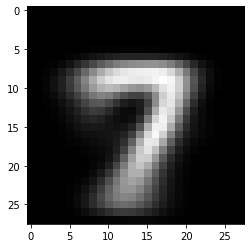

In [40]:
start=time.time()

centroide_total = []
for i in range(10): # on calcul le centroïde pour chaque chiffre i entre 0 et 9 avec X et label 
    centroide_total.append(image_moyenne(i, X_beta,label))
centroide_total=[centroide_total[i].reshape(784,1) for i in range(len(centroide_total))]

end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

plt.imshow(centroide_total[7].reshape(28,28),cmap = 'gray')

In [41]:

clusters = {}
for i in range(10):
    clusters[i] = [] 
    
centroids= {}
for i in range(10):
    centroids[i]=centroide_total[i]

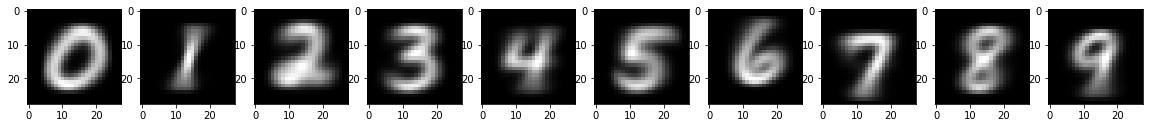

In [42]:
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')

In [47]:
k = 10
        
clusters = {}
for i in range(k):
    clusters[i] = [] 

centroids= {}
for i in range(k):
    centroids[i]=centroide_total[i]

indice=[[] for i in range(k)]
for i in range(m):
    euc_dist = [np.linalg.norm(X[i] - centroids[j]) for j in range(k)]
    minn=np.argmin(np.asarray(euc_dist))
    clusters[minn].append(X[i])
    indice[minn].append(i)

In [51]:
labels_clusters = [[] for _ in range(10)]
for i in range(len(indice)):
    for j in indice[i]:
        labels_clusters[i].append(label[j])
        
classes = []       #liste des chiffres majoritaires pour chaque cluster  
start=time.time()
for i in range(10):
    classes.append(majoritaire(labels_clusters[i]))
end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 593.6297798156738 secondes.


In [52]:
for t in range(10):
    L2 = []
    L1=[]
    for k in range(10):
        x=len([i for i in labels_clusters[t] if i == k ])
        l=len(labels_clusters[t])
        p=round((x/len(index_chiffre(t,label))*100),2)
        L1.append(p)
        L2.append(x)
    #print(str(L2))
    print(str(L1))

[87.21, 0.0, 1.74, 0.8, 0.17, 1.46, 1.43, 0.52, 0.9, 1.16]
[0.05, 96.32, 5.43, 2.67, 2.07, 6.42, 3.28, 4.76, 5.1, 2.59]
[0.83, 0.96, 75.95, 3.28, 0.44, 0.46, 2.42, 1.24, 1.26, 0.72]
[0.42, 0.2, 3.23, 77.58, 0.0, 11.57, 0.06, 0.08, 8.7, 1.48]
[0.23, 0.04, 3.02, 0.21, 81.02, 2.46, 2.07, 2.49, 1.14, 8.91]
[7.14, 1.3, 0.62, 6.37, 0.19, 67.34, 3.6, 0.33, 3.82, 1.0]
[2.78, 0.17, 2.97, 0.81, 1.8, 1.98, 86.5, 0.06, 0.89, 0.13]
[0.33, 0.1, 1.99, 1.15, 0.41, 0.73, 0.0, 83.96, 0.48, 4.39]
[1.36, 1.45, 4.03, 5.61, 1.25, 1.14, 0.44, 1.32, 72.89, 2.01]
[0.23, 0.09, 0.47, 2.41, 12.04, 2.33, 0.0, 5.48, 3.77, 77.34]


In [27]:
start=time.time()

indice=[[] for i in range(k)]
for i in range(m):
    euc_dist = [np.linalg.norm(X[i] - centroids[j]) for j in range(k)]
    minn=np.argmin(np.asarray(euc_dist))
    clusters[minn].append(X[i])
    indice[minn].append(i)
    
end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 16.414479732513428 secondes.


In [37]:
start=time.time()

clusters_nv=re_clusters(X, centroids, k)[0]
centroids_nv=re_centroids(clusters, k)
L=[]
seuil_actuel = abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv))
while seuil_actuel>tol :
    L.append(seuil_actuel)
    centroids=centroids_nv
    clusters=clusters_nv
    clusters_nv,indice=re_clusters(X, centroids, k)
    centroids_nv=re_centroids(clusters_nv, k)
    seuil_actuel = abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv))
L.append(seuil_actuel)

end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 1789.009073972702 secondes.


101


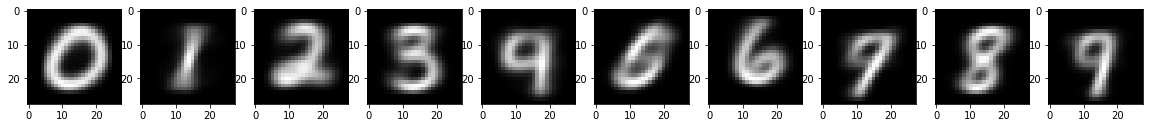

In [38]:
print(len(L))
fig, ax = plt.subplots(1,k,figsize=(20,2)) # affichage des centroïdes 
for i in range(k):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')

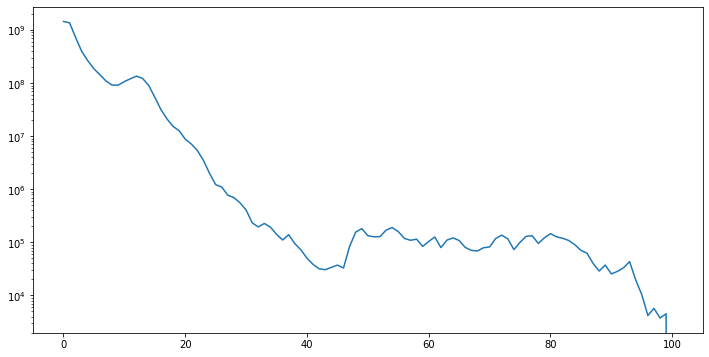

In [39]:
plt.figure(figsize=(12,6)) 
plt.plot([i for i in range(len(L))],L)
plt.yscale('log')
plt.show()

In [42]:
labels_clusters = [[] for _ in range(k)]
for i in range(len(indice)):
    for j in indice[i]:
        labels_clusters[i].append(label[j])

In [43]:
classes = []       #liste des chiffres majoritaires pour chaque cluster  
start=time.time()
for i in range(k):
    classes.append(majoritaire(labels_clusters[i]))
end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 791.5288264751434 secondes.


[array([0.]), array([1.]), array([2.]), array([3.]), array([4.]), array([5.]), array([6.]), array([7.]), array([8.]), array([7.])]


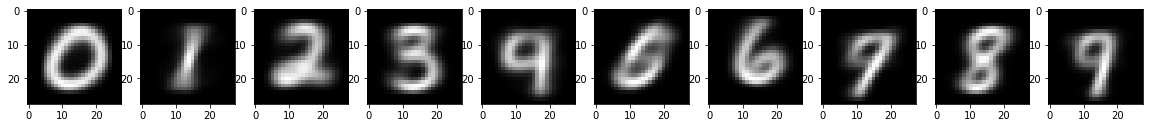

In [44]:
fig, ax = plt.subplots(1,k,figsize=(20,2)) # affichage des centroïdes 
for i in range(k):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')
print(classes)

In [118]:
classes[9] = np.array([9.])
#list_precision = [calcul_pourcentage(classes)]
calcul_pourcentage(classes)

60.69540616238602

In [4]:
pourcentage_list = 60.69540616238602

**LE COUSIN A DIT**

In [111]:
for t in range(10):
    L = []
    L1=[]
    for k in range(10):
        x=len([i for i in labels_clusters[t] if i == k ])
        l=len(labels_clusters[t])
        p=round((x/len(index_chiffre(t,label))*100),2)
        L1.append(p)
        L.append(x)
    #print(str(L))
    print(str(L1))

[68.97, 0.0, 0.72, 0.33, 0.03, 0.8, 1.17, 0.2, 0.52, 0.61]
[0.11, 97.98, 10.49, 5.15, 3.22, 7.45, 5.26, 5.61, 8.24, 2.3]
[0.13, 0.82, 69.38, 2.65, 0.21, 0.1, 0.92, 0.7, 0.73, 0.11]
[3.77, 0.18, 4.59, 65.26, 0.0, 29.76, 0.46, 0.04, 16.48, 1.27]
[0.72, 0.13, 3.02, 1.42, 38.94, 3.71, 2.37, 11.03, 2.17, 27.08]
[24.47, 0.13, 3.75, 9.28, 1.87, 27.13, 20.48, 0.13, 5.04, 0.36]
[2.6, 0.19, 2.31, 0.55, 1.79, 1.25, 69.66, 0.06, 0.74, 0.12]
[0.04, 0.08, 0.88, 0.49, 25.26, 2.28, 0.01, 43.01, 2.82, 25.39]
[0.86, 0.26, 3.16, 13.93, 0.13, 14.75, 0.48, 0.18, 59.02, 0.78]
[0.29, 0.5, 0.78, 2.29, 25.93, 4.51, 0.07, 41.26, 2.31, 40.99]


**Réitération avec un 7 supplémentaire**

In [12]:
start=time.time()

t = 7
nb_clusters = 2

idx = np.where((label == t))[0]
Xk = np.array(data)[idx]    
Ykk = np.array(label)[idx]
Yk = np.reshape(Ykk, (len(Ykk),))
kmeans = sklearn.cluster.KMeans(n_clusters=nb_clusters).fit(Xk,Yk)
centroidk = kmeans.cluster_centers_
    
end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')


Temps de réalisation : 8.449905633926392 secondes.


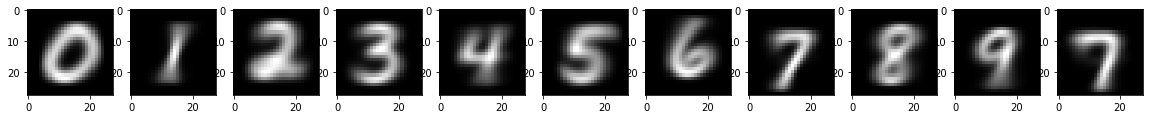

In [13]:
centre_de_depart = list(np.copy(centroide_total))
centre_de_depart[7] = centroidk[0].reshape(784,1)
centre_de_depart.append(centroidk[1].reshape(784,1))
fig, ax = plt.subplots(1,len(centre_de_depart),figsize=(20,2)) # affichage des centroïdes 
for i in range(len(centre_de_depart)):
    ax[i].imshow(centre_de_depart[i].reshape(28,28),cmap='gray')

In [32]:
k = 11

def tout_faire(centres_de_depart):
    k = len(centres_de_depart)
        
    clusters = {}
    for i in range(k):
        clusters[i] = [] 

    centroids= {}
    for i in range(k):
        centroids[i]=centres_de_depart[i]
        
    indice=[[] for i in range(k)]
    for i in range(m):
        euc_dist = [np.linalg.norm(X[i] - centroids[j]) for j in range(k)]
        minn=np.argmin(np.asarray(euc_dist))
        clusters[minn].append(X[i])
        indice[minn].append(i)
        
    
    clusters_nv=re_clusters(X, centroids, k)[0]
    centroids_nv=re_centroids(clusters, k)
    L=[]
    seuil_actuel = abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv))
    while seuil_actuel>tol :
        L.append(seuil_actuel)
        centroids=centroids_nv
        clusters=clusters_nv
        clusters_nv,indice=re_clusters(X, centroids, k)
        centroids_nv=re_centroids(clusters_nv, k)
        seuil_actuel = abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv))
    L.append(seuil_actuel)
    
    return indice,centroids,L

In [15]:
start=time.time()

indice,centroids,L = tout_faire(centre_de_depart)

end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 2858.6601684093475 secondes.


In [ ]:
labels_clusters = [[] for _ in range(k)]
for i in range(len(indice)):
    for j in indice[i]:
        labels_clusters[i].append(label[j])
        
classes = []       #liste des chiffres majoritaires pour chaque cluster  
start=time.time()
for i in range(k):
    classes.append(majoritaire(labels_clusters[i]))
end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

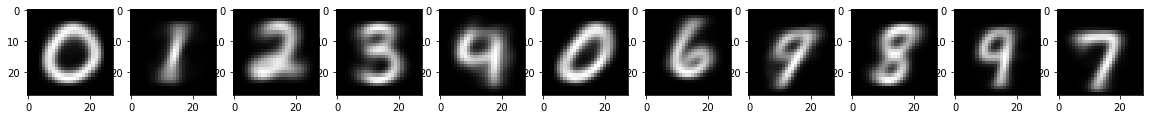

In [16]:
fig, ax = plt.subplots(1,11,figsize=(20,2)) # affichage des centroïdes 
for i in range(11):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')

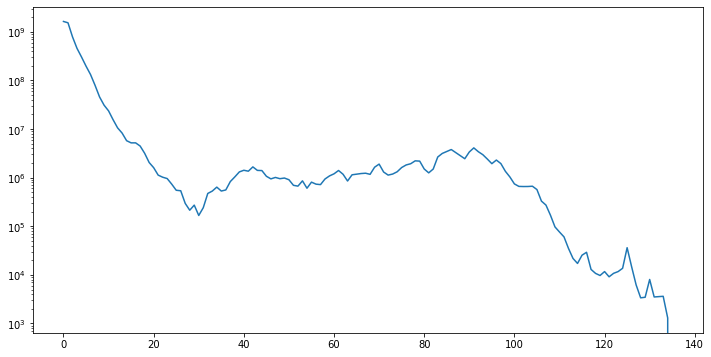

In [17]:
plt.figure(figsize=(12,6)) 
plt.plot([i for i in range(len(L))],L)
plt.yscale('log')
plt.show()

In [18]:
labels_clusters = [[] for _ in range(k)]
for i in range(len(indice)):
    for j in indice[i]:
        labels_clusters[i].append(label[j])
        
classes = []       #liste des chiffres majoritaires pour chaque cluster  
start=time.time()
for i in range(k):
    classes.append(majoritaire(labels_clusters[i]))
end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 556.3308093547821 secondes.


[array([0.]), array([1.]), array([2.]), array([3.]), array([4.]), array([0.]), array([6.]), array([7.]), array([8.]), array([9.]), array([7.])]


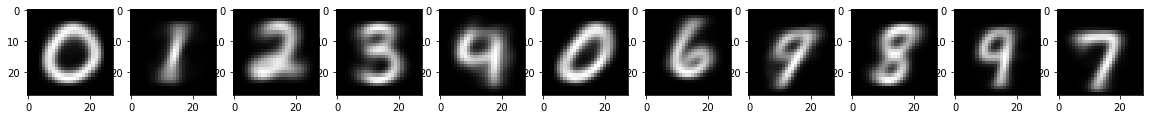

In [19]:
fig, ax = plt.subplots(1,k,figsize=(20,2)) # affichage des centroïdes 
for i in range(k):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')
print(classes)

In [23]:
for t in range(10):
    P = []
    L1=[]
    for m in range(10):
        x=len([i for i in labels_clusters[t] if i == m ])
        l=len(labels_clusters[t])
        p=round((x/(len(index_chiffre(t,label)))*100),2)
        L1.append(p)
        P.append(x)
    #print(str(P))
    print(str(L1))
P = []
L1=[]
for m in range(10):
    x=len([i for i in labels_clusters[7] if i == m ])
    l=len(labels_clusters[7])
    p=round((x/(len(index_chiffre(7,label)))*100),2)
    L1.append(p)
    P.append(x)
print(str(L1))

[45.99, 0.0, 0.23, 0.25, 0.03, 1.01, 1.75, 0.04, 0.56, 0.29]
[0.2, 97.73, 10.46, 5.74, 2.07, 8.32, 6.03, 5.61, 7.83, 2.12]
[0.33, 1.12, 70.0, 4.31, 0.19, 0.31, 0.83, 0.7, 0.97, 0.06]
[2.83, 0.18, 5.07, 65.17, 0.0, 28.41, 0.43, 0.07, 17.77, 1.32]
[1.06, 0.01, 3.24, 0.66, 32.9, 2.24, 11.34, 6.81, 2.04, 20.13]
[46.79, 0.0, 1.96, 1.88, 0.11, 3.98, 1.85, 0.22, 0.62, 0.43]
[3.13, 0.23, 2.41, 0.95, 1.66, 2.17, 75.58, 0.06, 0.76, 0.13]
[0.78, 0.18, 1.12, 1.06, 25.23, 13.23, 0.14, 26.9, 6.09, 24.2]
[2.51, 0.31, 2.71, 17.44, 0.09, 22.78, 1.25, 0.1, 56.64, 0.63]
[0.22, 0.47, 0.65, 2.66, 34.91, 6.55, 0.11, 7.09, 3.97, 47.38]
[0.78, 0.18, 1.12, 1.06, 25.23, 13.23, 0.14, 26.9, 6.09, 24.2]


**Test avec que un 5 en plus**

In [24]:
start=time.time()

t = 5
nb_clusters = 2

idx = np.where((label == t))[0]
Xk = np.array(data)[idx]    
Ykk = np.array(label)[idx]
Yk = np.reshape(Ykk, (len(Ykk),))
kmeans = sklearn.cluster.KMeans(n_clusters=nb_clusters).fit(Xk,Yk)
centroidk = kmeans.cluster_centers_
    
end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 6.411354303359985 secondes.


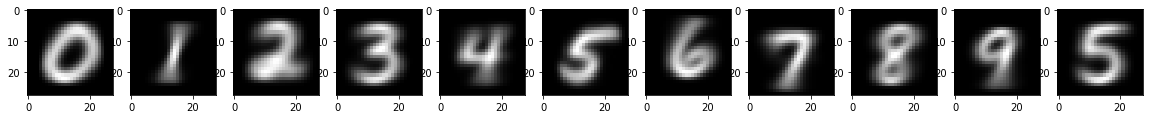

In [37]:
centre_de_depart = list(np.copy(centroide_total))
centre_de_depart[t] = centroidk[0].reshape(784,1)
centre_de_depart.append(centroidk[1].reshape(784,1))
fig, ax = plt.subplots(1,len(centre_de_depart),figsize=(20,2)) # affichage des centroïdes 
for i in range(len(centre_de_depart)):
    ax[i].imshow(centre_de_depart[i].reshape(28,28),cmap='gray')

In [38]:
len(centre_de_depart)

11

In [36]:
start=time.time()
k=11

indice5,centroids5,L5 = tout_faire(centre_de_depart)

end=time.time()
print('Temps de réalisation : '+str(end-start)+' secondes.')

Temps de réalisation : 0.02400493621826172 secondes.
